In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso

This task is to predict the sales prices for houses sold using the AMES housing data set.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [7]:
# Look at the train data

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


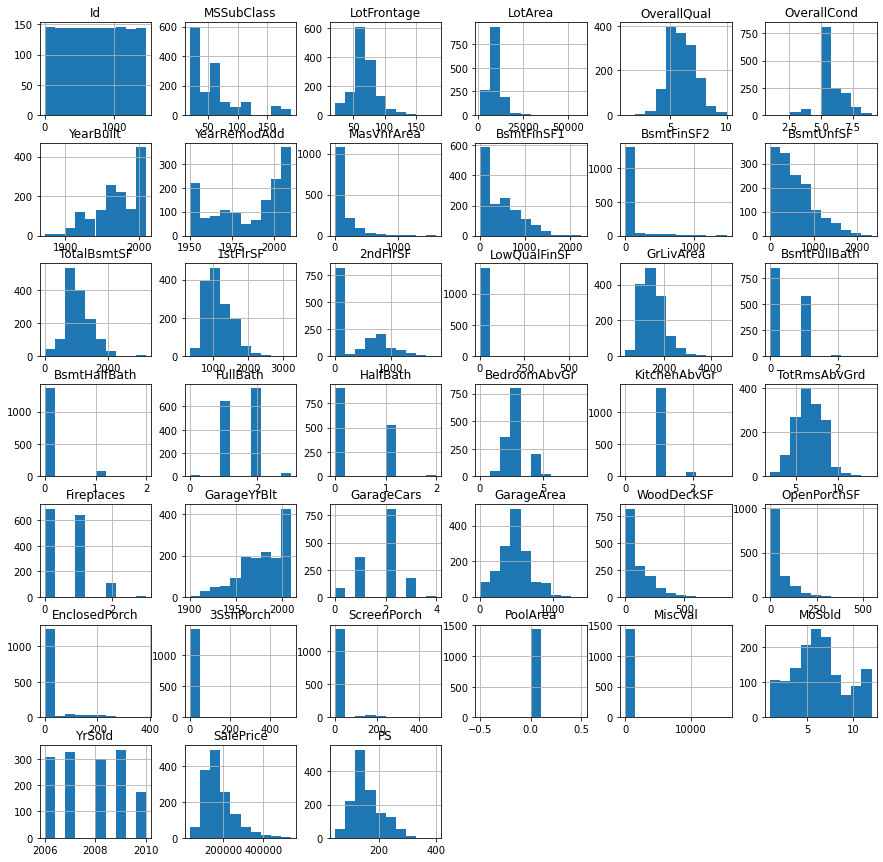

In [19]:
# Histogram for independent variables

train.hist(figsize = (15, 15))
plt.show()

<AxesSubplot:>

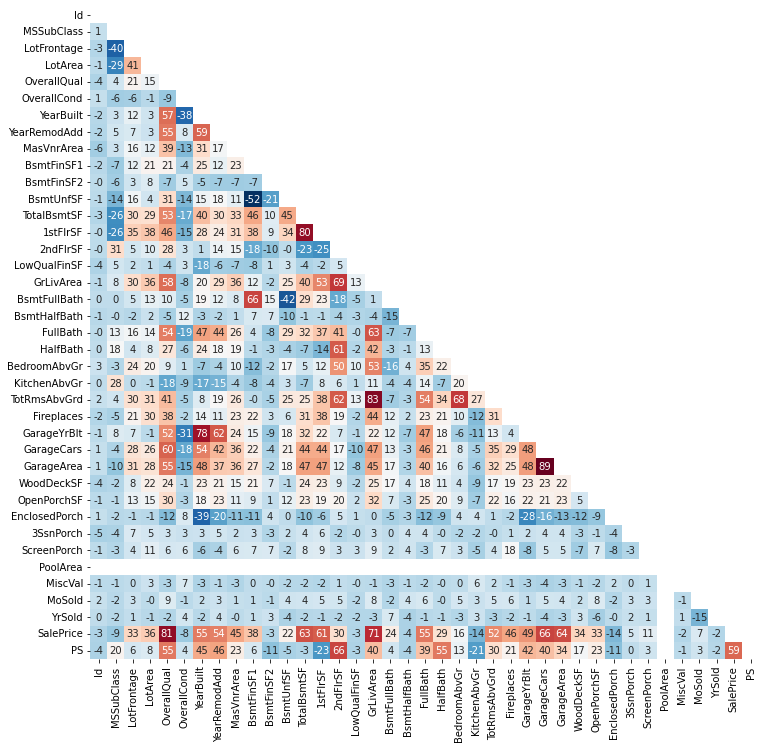

In [18]:
# Let us look at the heat map

corr = train.corr()

mask = np.zeros_like(corr)
triangle = np.triu_indices_from(mask)
for i, j in zip(triangle[0], triangle[1]):
    mask[i, j] = 1
    
plt.figure(figsize = (12,12))
sns.heatmap(corr*100, cbar = False, cmap = 'RdBu_r', annot = True, fmt = '.0f', mask = mask)

In [20]:
train = train[train["1stFlrSF"]<=4500]
train = train[train["SalePrice"]<=550000]
train["PS"] = train["SalePrice"]/train["1stFlrSF"]
train.shape

(1441, 82)

In [21]:
def aggregate(column_name, train, test):
    threshold = 30
    
    # Identify categories with counts below the threshold
    value_counts = train[column_name].value_counts()
    to_replace = value_counts[value_counts < threshold].index
    
    # Replace those categories with "others" for both train and test
    train[column_name].replace(to_replace=to_replace, value="others", inplace=True)
    test[column_name].replace(to_replace=to_replace, value="others", inplace=True)

# Assuming train and test are already defined and loaded
object_columns = train.select_dtypes(include='object').columns
numeric_cols = train.select_dtypes(include=[np.number]).columns

# Scatter Plots for all independent variables & target variables

/Users/wsyoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


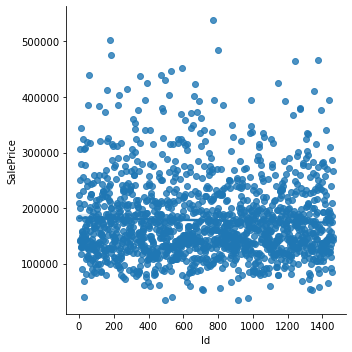

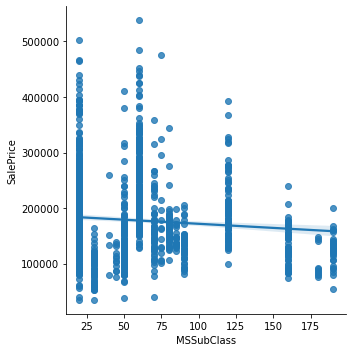

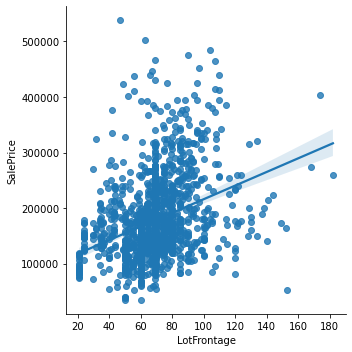

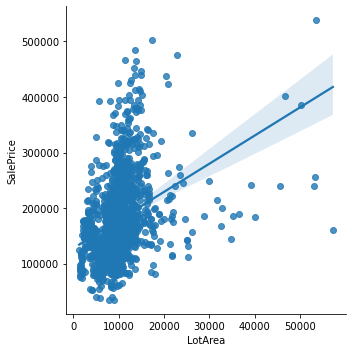

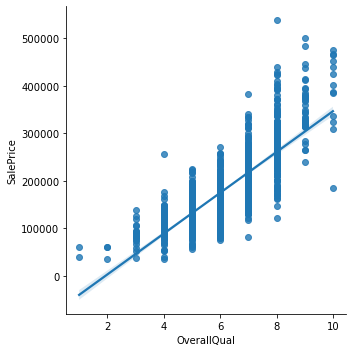

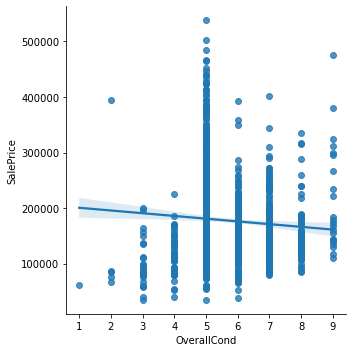

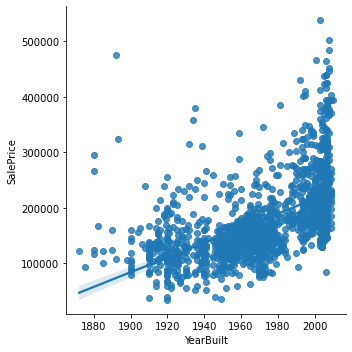

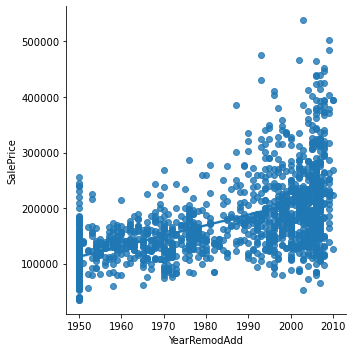

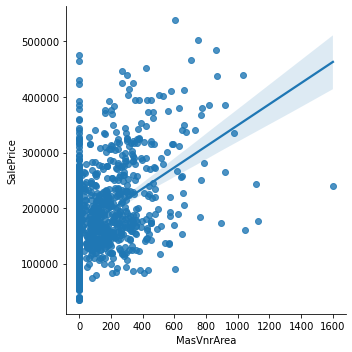

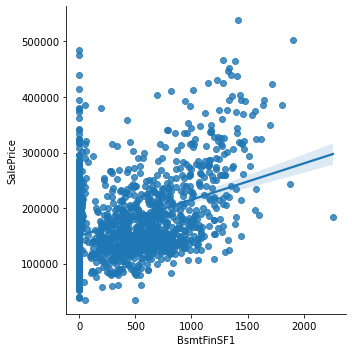

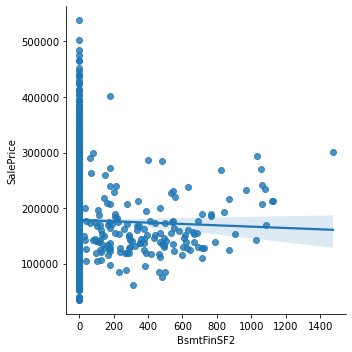

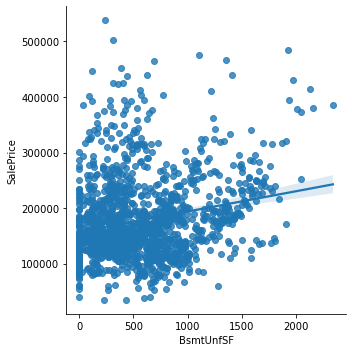

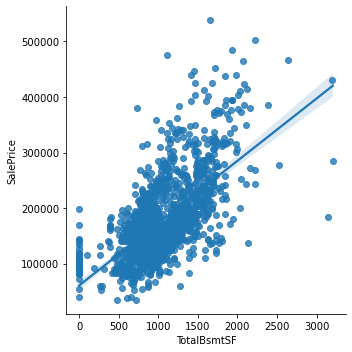

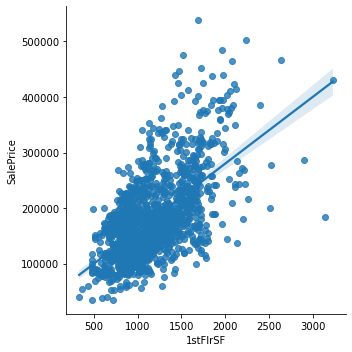

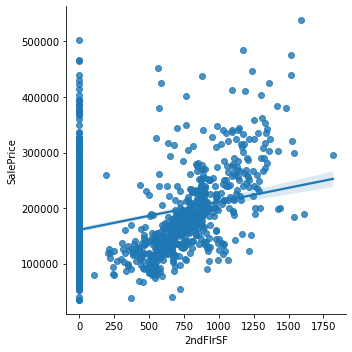

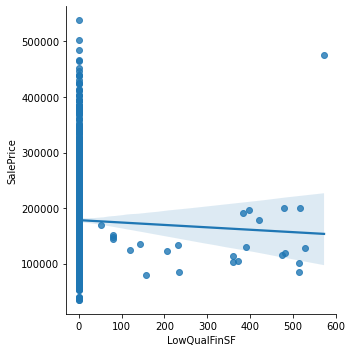

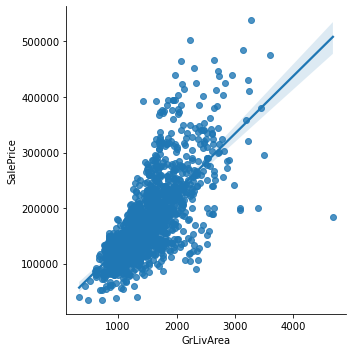

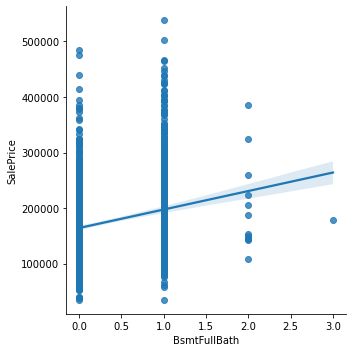

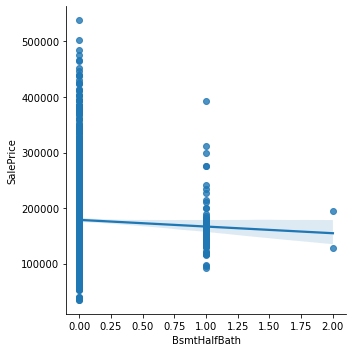

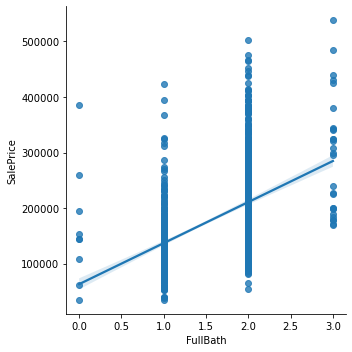

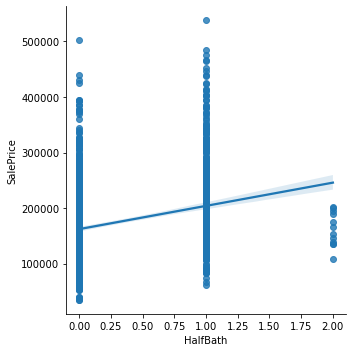

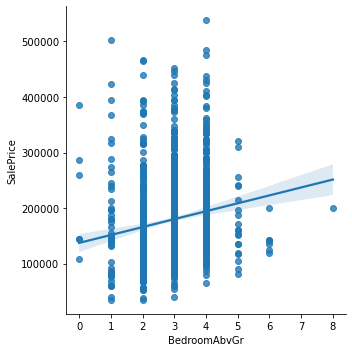

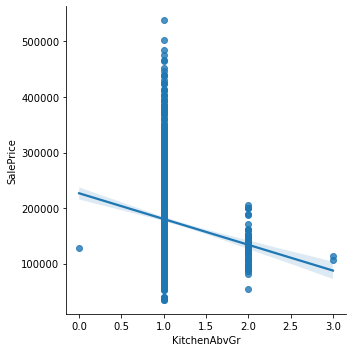

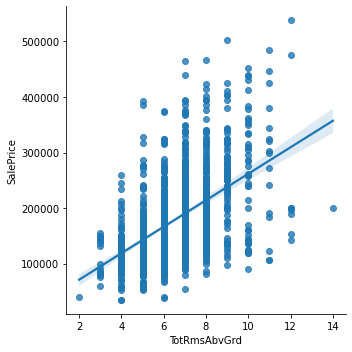

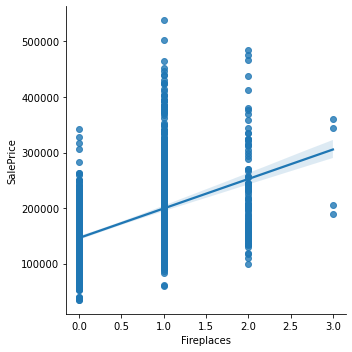

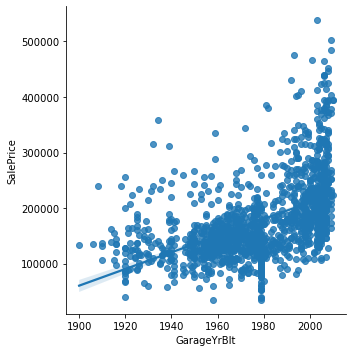

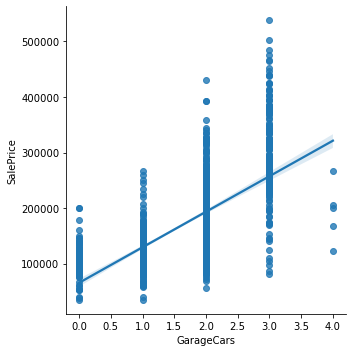

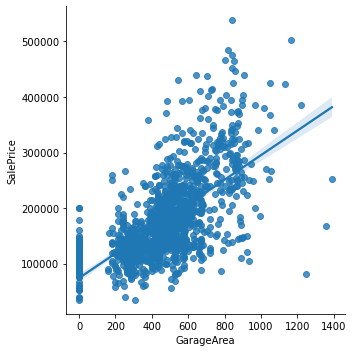

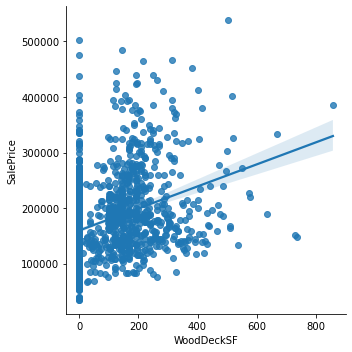

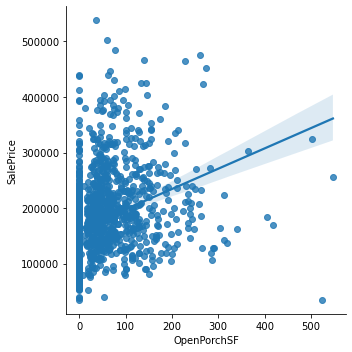

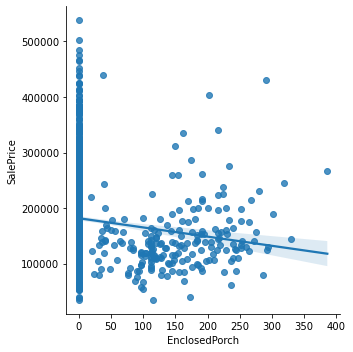

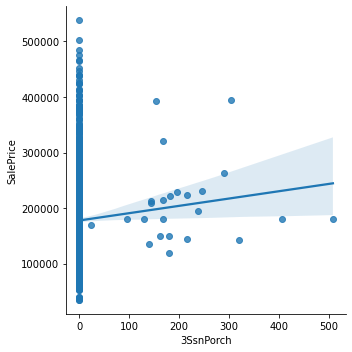

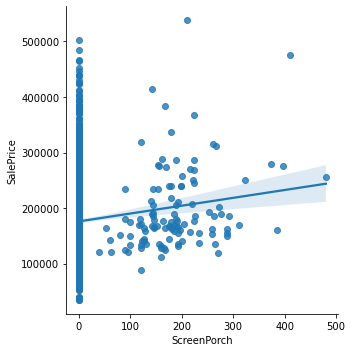

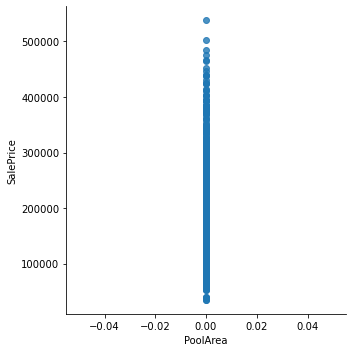

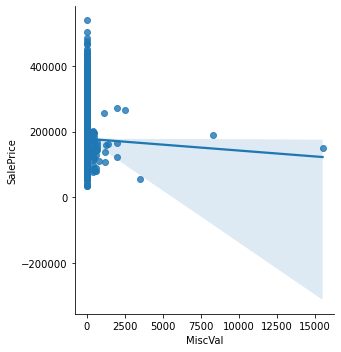

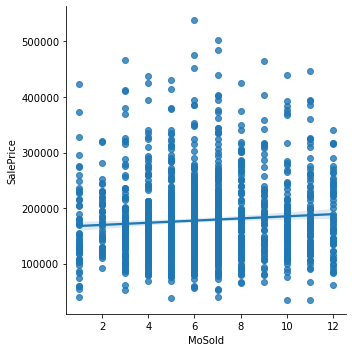

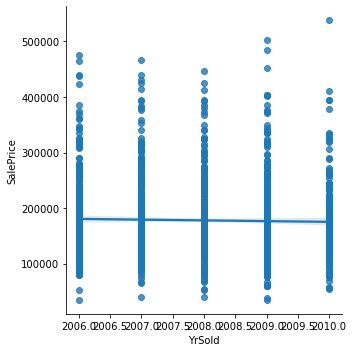

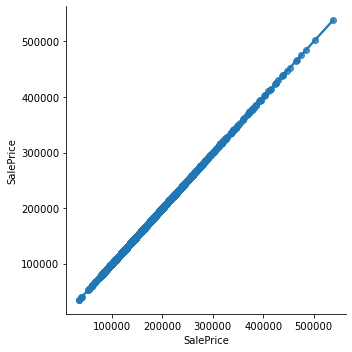

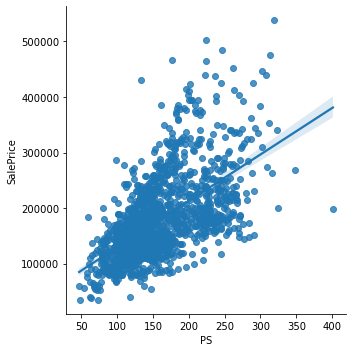

In [22]:
for col in numeric_cols:
    sns.lmplot(x = col, y = 'SalePrice', data= train)
    plt.plot()

In [23]:
train.fillna(train.median(), inplace = True)
test.fillna(test.median(),inplace = True)

print((train.LotFrontage>250).sum())
print((train.LotArea>60000).sum())
print((train.PoolArea>500).sum())

train.shape

0
0
0


/var/folders/5s/q7nghp294wng495b23x7ftfr0000gn/T/ipykernel_12041/3276234431.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train.fillna(train.median(), inplace = True)
/var/folders/5s/q7nghp294wng495b23x7ftfr0000gn/T/ipykernel_12041/3276234431.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test.fillna(test.median(),inplace = True)


(1441, 82)

# The extreme outliers are not really good at predicting the salesprice. Therefore, I eliminated them

In [24]:
train = train[train.LotFrontage<=250]
train = train[train.LotArea<=60000]
train = train[train.PoolArea<=500]
train.shape

(1441, 82)

In [25]:
y = train.SalePrice
X = train.drop(['Id', 'SalePrice', 'PS'], axis = 1)
XT = test.drop(['Id'], axis =1)

# Do some Feature Engineering. 

In [26]:
X["Yr"] = X["YearRemodAdd"]+X["YearBuilt"]
XT["Yr"] = XT["YearRemodAdd"]+XT["YearBuilt"]

X['new'] = np.where(X['YearBuilt']>2000, 1, 0)
XT['new'] = np.where(XT['YearBuilt']>2000, 1, 0)

X['remod'] = np.where(X['YearBuilt']<X['YearRemodAdd'], 1, 0)
XT['remod'] = np.where(XT['YearBuilt']<XT['YearRemodAdd'], 1, 0)
for col in ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']:
    X[col+'_'] = (X[col]>0).astype(int)
    XT[col+'_'] = (X[col]>0).astype(int)

X["Yrn"] = X["YrSold"]-np.maximum(X["YearBuilt"], X["YearRemodAdd"])
XT["Yrn"] = XT["YrSold"]-np.maximum(XT["YearBuilt"], XT["YearRemodAdd"])

X.BsmtCond.replace(["Fa", "Gd","Po", "TA"],[4,7,2,6], inplace = True)
XT.BsmtCond.replace(["Fa", "Gd","Po", "TA"],[4,7,2,6], inplace = True)

X.drop(["YearRemodAdd", "GarageYrBlt"], axis = 1 , inplace = True)
XT.drop(["YearRemodAdd", "GarageYrBlt"], axis = 1 , inplace = True)

X.drop("YearBuilt", axis = 1 , inplace = True)
XT.drop("YearBuilt", axis = 1 , inplace = True)

X.BsmtQual.replace(["Gd", "TA", "Ex","Fa"], [3,1,4,0],inplace=True)
X.ExterQual.replace(["Gd", "TA", "Ex","Fa"], [3,1,4,0],inplace=True)

XT.BsmtQual.replace(["Gd", "TA", "Ex","Fa"], [3,1,4,0],inplace=True)
XT.ExterQual.replace(["Gd", "TA", "Ex","Fa"], [3,1,4,0],inplace=True)


X.KitchenQual.replace(["Gd", "TA", "Ex","Fa"], [2,1,3,1],inplace=True)
XT.KitchenQual.replace(["Gd", "TA", "Ex","Fa"], [2,1,3,1],inplace=True)

s = train.groupby('Functional')['PS'].median()
X.Functional.replace(s, inplace = True)
XT.Functional.replace(s, inplace = True)


X["YrSold"].replace([2006, 2007, 2008, 2009, 2010], [18, 17, 16, 15, 15], inplace=True)
XT["YrSold"].replace([2006, 2007, 2008, 2009, 2010], [18, 17, 16, 15, 15], inplace=True)

X.MSZoning.replace(["A", "C", "I", "RH"], 0, inplace =True)
X.MSZoning.replace([ "FV","RL","RP","RM"], 1,inplace =True)
XT.MSZoning.replace(["A", "C", "FV","I", "RH"], 0, inplace =True)
XT.MSZoning.replace(["FV","RL","RP","RM"], 1,inplace =True)
train['PS'] = train['SalePrice']/train['1stFlrSF']

medians = train.groupby('Neighborhood')['PS'].median()
med = train.groupby('SaleCondition').PS.median()

# Replace neighborhood names with median sale prices
X['Neighborhood'] = X['Neighborhood'].replace(medians)
XT['Neighborhood']= XT['Neighborhood'].replace(medians)

X['SaleCondition']= X['SaleCondition'].replace(med)
XT['SaleCondition'] = XT['SaleCondition'].replace(med)

X["SaleType"].replace('WD', 2, inplace =True)
X["SaleType"].replace('New', 1, inplace = True)
X["SaleType"].replace(["CWD", "VWD","COD", "Con", "ConLW", "ConLI", "ConLD", "Oth"],0, inplace =True)
XT["SaleType"].replace('WD', 2, inplace =True)
XT["SaleType"].replace('New', 1, inplace = True)
XT["SaleType"].replace(["CWD", "VWD","COD", "Con", "ConLW", "ConLI", "ConLD", "Oth"],0, inplace =True)
X["2nd"] = np.where(X["2ndFlrSF"]>0, 1, 0)
XT["2nd"] = np.where(XT["2ndFlrSF"]>0, 1, 0)

In [27]:
from sklearn.preprocessing import StandardScaler
X = pd.get_dummies(X)
XT = pd.get_dummies(XT)

In [28]:
X.fillna(X.median(), inplace = True)
XT.fillna(X.median(),inplace = True)

In [29]:
columns = set(X.columns) & set(XT.columns)
X = X[columns]
XT = XT[columns]

/var/folders/5s/q7nghp294wng495b23x7ftfr0000gn/T/ipykernel_12041/1806248752.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = X[columns]
/var/folders/5s/q7nghp294wng495b23x7ftfr0000gn/T/ipykernel_12041/1806248752.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  XT = XT[columns]


In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

# Feature Selection using Lasso

In [31]:
lasso = Lasso(alpha = 1)

lasso.fit(x_train, y_train)

/Users/wsyoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281898919769.9904, tolerance: 618855106.2295111
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [32]:
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)

mask = np.abs(lasso.coef_) > 0.0001

# Extract column names
selected_columns = X.columns[mask]

# Use these columns to subset the original dataframe
X_selected = X[selected_columns]
XT_selected = XT[selected_columns]

print(selected_columns)  # This will show you which columns were selected
len(selected_columns)

Index(['SaleType_2', '2nd', 'Electrical_SBrkr', 'BsmtCond_4', 'MSZoning_1',
       'MasVnrType_Stone', 'BsmtFinType2_Unf', 'CentralAir_Y',
       'RoofStyle_Gable', 'Exterior2nd_VinylSd',
       ...
       'BsmtExposure_Av', 'HeatingQC_Fa', 'FireplaceQu_others',
       'GarageFinish_Fin', 'GarageQual_others', 'BsmtFinType1_ALQ',
       'MiscFeature_Shed', 'RoofStyle_Hip', 'Foundation_CBlock', 'GrLivArea'],
      dtype='object', length=177)


/Users/wsyoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 281898919769.9904, tolerance: 618855106.2295111
  model = cd_fast.enet_coordinate_descent(


177

In [33]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Hyperparameters
rf_hyperparameters = {
    'randomforestregressor__n_estimators': [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
    'randomforestregressor__min_samples_split': [3, 5, 10]
}
gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate': [0.01, 0.1, 0.3],
    'gradientboostingregressor__max_depth': [1, 3]
}

# Pipelines
pipelines = {
    'rf': make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))
}
hyperparameters = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
}

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

fitted_models = {}
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1, scoring='neg_mean_absolute_error')
    model.fit(X_train, y_train)  # Fitting the model only once
    fitted_models[name] = model
    print(name, 'has been fitted.')

# Predicting on the validation set using best estimators from GridSearchCV
pre_val_gb = fitted_models['gb'].best_estimator_.predict(X_val)
pre_val_rf = fitted_models['rf'].best_estimator_.predict(X_val)

best_mae = float('inf')
best_weight = 0
for p in [i/20 for i in range(0, 21)]:
    blended_pred = p * pre_val_gb + (1 - p) * pre_val_rf
    mae = mean_absolute_error(blended_pred, y_val)
    if mae < best_mae:
        best_mae = mae
        best_weight = p
print(f"Optimal blending weight: {best_weight}")

# Predicting on the test set
pred_gb = fitted_models['gb'].best_estimator_.predict(XT)
pred_rf = fitted_models['rf'].best_estimator_.predict(XT)
blended_test_pred = best_weight * pred_gb + (1 - best_weight) * pred_rf 

submission["SalePrice"] = blended_test_pred
submission.to_csv("Submission.csv", index=None)


rf has been fitted.
gb has been fitted.
Optimal blending weight: 0.6


In [34]:
best_mae

13353.971360240506

In [35]:
pred_gb_ = fitted_models['gb'].best_estimator_.predict(X_train)
pred_rf_ = fitted_models['rf'].best_estimator_.predict(X_train)
X_new = np.column_stack((pred_gb_, pred_rf_))

# Assuming y_train is available and is the correct target variable for fitting
lasso = Lasso()
lasso.fit(X_new, y_train)



/Users/wsyoo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48168156803.32405, tolerance: 623302666.4227561
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [36]:
pred_gb = fitted_models['gb'].best_estimator_.predict(XT)
pred_rf = fitted_models['rf'].best_estimator_.predict(XT)

In [37]:
X_ = np.column_stack((pred_gb, pred_rf))

blended_test_pred = lasso.predict(X_)
submission["SalePrice"] = blended_test_pred
submission.to_csv("Submission.csv", index=None)



In [38]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

rf -16124.262841951588
gb -15395.991223253743


In [39]:
missing_cols = set(x_train.columns) - set(XT.columns)
for col in missing_cols:
    XT[col] = x_train[col].median()
    
missing_cols = set(XT.columns) - set(x_train.columns)
for col in missing_cols:
    XT.drop(col, axis = 1,inplace = True)